<a href="https://colab.research.google.com/github/Ashi743/pytorch/blob/main/Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#nn classification
import sklearn
from sklearn.datasets import make_circles

n_samples= 1000
X,y= make_circles(n_samples=n_samples, noise=0.03, random_state= 42)

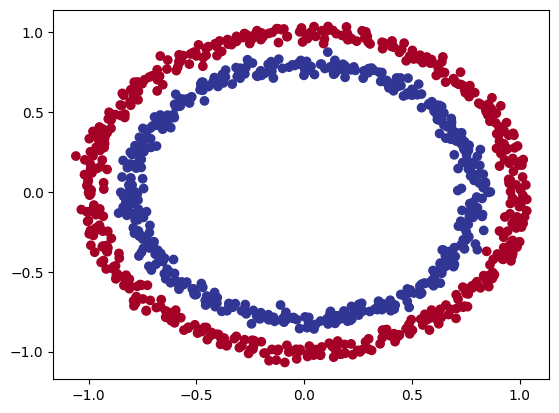

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [77]:
import pandas as pd
df= pd.DataFrame(X, columns=["feature 1", "feature 2"])
df["target"]= y
df.head(), df.target.value_counts()

(   feature 1  feature 2  target
 0   0.754246   0.231481       1
 1  -0.756159   0.153259       1
 2  -0.815392   0.173282       1
 3  -0.393731   0.692883       1
 4   0.442208  -0.896723       0,
 target
 1    500
 0    500
 Name: count, dtype: int64)

continually familiarize yourself with the shape of the data you're working with.

In [78]:
X.shape, y.shape  # 2 INPUTS AND 1 OUTPUT

((1000, 2), (1000,))

In [79]:
#TURN DATA TO TENSOR RATHER DOING IN NUMPY
import torch
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)


In [80]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [81]:
#TRAIN, TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [82]:
#building a model
import torch
from torch import nn

#make device agnostic
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [83]:
class NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 =nn.Linear(in_features=2, out_features=5)
    self.layer_2 =nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0= NN().to(device)
model_0

NN(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [84]:
#USING SEQUENTIAL MODEL
model_seq= nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_seq

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [85]:
#LOSS AND OPTIMIZER
loss_fn = nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr= 0.1)

In [86]:
#loss is how wrong model is; eval is how right it is
def accuracy(y_true, y_pred):
  correct =torch.eq(y_true, y_pred).sum().item()    #TO EQUATE Y_PRED, Y_TRUE
  acc= (correct/len(y_pred))
  return acc

In [87]:
#what will comee out of forward pass is some numbers rather label 1,0
y_logits= model_0(X_test.to(device))
y_logits[:10] #RAW OUTPUTS ARE LOGITS

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)

In [88]:
#use sigmoid  on model logits
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], grad_fn=<SliceBackward0>)

In [89]:
#ALL ABOVE CODES IN ONE
y_preds = torch.round(y_pred_probs)
y_pred_labels =torch.round(torch.sigmoid(model_0(X_test.to(device)) ) )
#print(torch.eq(y_pred_labels.squeeze(), y_preds.squeeze()))


In [90]:
y_pred_labels.shape,  y_preds.shape

(torch.Size([200, 1]), torch.Size([200, 1]))

In [91]:
y_test.shape, y_pred_labels.shape

(torch.Size([200]), torch.Size([200, 1]))

** we converted our model's raw outputs (logits) to prediction probabilities

using a sigmoid activation function.**

In [92]:
y_logits.shape, y_train.shape


(torch.Size([200, 1]), torch.Size([800]))

In [93]:
import torch
import torch.nn as nn

# Set seed for reproducibility
torch.manual_seed(42)

# Define epochs
epochs = 100

# Move data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Define loss function and optimizer outside the loop
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy with Logits Loss
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# Training and evaluation loop
for epoch in range(epochs):
    # Training phase
    model_0.train()
    y_logits = model_0(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to probabilities and round

    # Calculate training loss and accuracy
    train_loss = loss_fn(y_logits, y_train.unsqueeze(dim= 1))
    train_acc = accuracy(y_true=y_train, y_pred=y_pred)

    # Zero gradients, backpropagate, and update the optimizer
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Evaluation phase
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test.unsqueeze(dim= 1))  # Use the same loss function for test loss
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
              f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Train Loss: 0.6957 | Train Acc: 400.00% | Test Loss: 0.6972 | Test Acc: 100.00%
Epoch: 10 | Train Loss: 0.6940 | Train Acc: 400.00% | Test Loss: 0.6962 | Test Acc: 100.00%
Epoch: 20 | Train Loss: 0.6934 | Train Acc: 400.00% | Test Loss: 0.6959 | Test Acc: 100.00%
Epoch: 30 | Train Loss: 0.6932 | Train Acc: 400.00% | Test Loss: 0.6958 | Test Acc: 100.00%
Epoch: 40 | Train Loss: 0.6931 | Train Acc: 400.00% | Test Loss: 0.6957 | Test Acc: 100.00%
Epoch: 50 | Train Loss: 0.6931 | Train Acc: 400.00% | Test Loss: 0.6957 | Test Acc: 100.00%
Epoch: 60 | Train Loss: 0.6931 | Train Acc: 400.00% | Test Loss: 0.6956 | Test Acc: 100.00%
Epoch: 70 | Train Loss: 0.6930 | Train Acc: 400.00% | Test Loss: 0.6956 | Test Acc: 100.00%
Epoch: 80 | Train Loss: 0.6930 | Train Acc: 400.00% | Test Loss: 0.6955 | Test Acc: 100.00%
Epoch: 90 | Train Loss: 0.6930 | Train Acc: 400.00% | Test Loss: 0.6955 | Test Acc: 100.00%


In [94]:
#visualize the results


In [95]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists


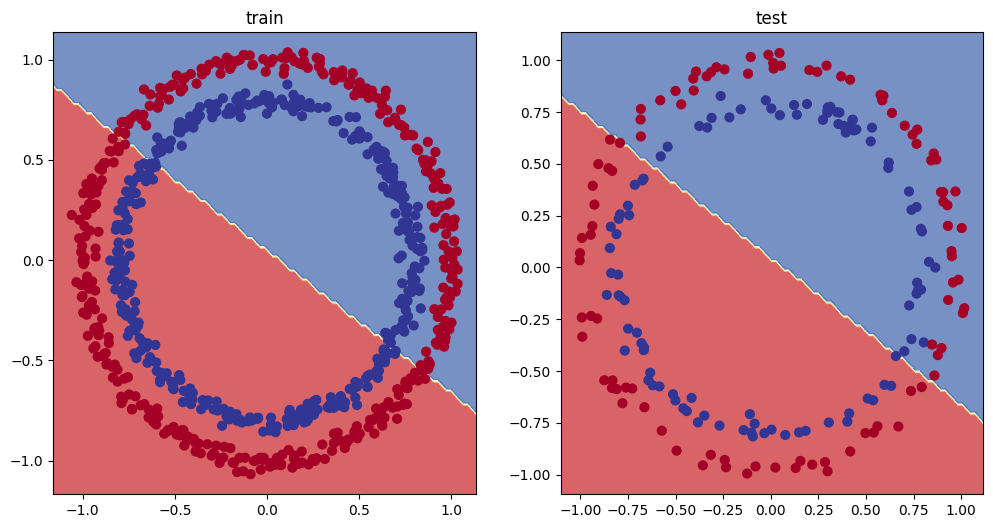

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [97]:
#adding hidden layers(deeper), more epochs(longer), more neurons/hidden units(wider)
class NN_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features= 2, out_features= 10)
    self.layer_2= nn.Linear(in_features= 10, out_features= 10)
    self.layer_3= nn.Linear(in_features= 10, out_features= 1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1= NN_1().to(device)
model_1

NN_1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [98]:
#LOSS FUNCTION , OPTIMIZER
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_1.parameters(), lr= 0.1)

In [99]:
torch.manual_seed(42)
epochs= 1000  #train longer
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #train
  model_1.train()
  y_logits= model_1(X_train)
  y_pred= torch.round(torch.sigmoid(y_logits))

  train_loss= loss_fn(y_logits, y_train.unsqueeze(dim= 1))
  acc= accuracy(y_true= y_train.unsqueeze(dim= 1), y_pred= y_pred)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_logits= model_1(X_test)
    test_pred= torch.round(torch.sigmoid(test_logits))
    test_loss= loss_fn(test_logits, y_test.unsqueeze(dim= 1))
    test_acc= accuracy(y_true= y_test.unsqueeze(dim= 1), y_pred= test_pred)

  if epoch % 10 == 0:
     print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69396, Accuracy: 0.51% | Test loss: 0.69261, Test acc: 0.51%
Epoch: 10 | Loss: 0.69369, Accuracy: 0.50% | Test loss: 0.69270, Test acc: 0.50%
Epoch: 20 | Loss: 0.69351, Accuracy: 0.50% | Test loss: 0.69283, Test acc: 0.49%
Epoch: 30 | Loss: 0.69339, Accuracy: 0.51% | Test loss: 0.69297, Test acc: 0.48%
Epoch: 40 | Loss: 0.69329, Accuracy: 0.50% | Test loss: 0.69310, Test acc: 0.49%
Epoch: 50 | Loss: 0.69322, Accuracy: 0.50% | Test loss: 0.69324, Test acc: 0.50%
Epoch: 60 | Loss: 0.69317, Accuracy: 0.49% | Test loss: 0.69336, Test acc: 0.52%
Epoch: 70 | Loss: 0.69312, Accuracy: 0.49% | Test loss: 0.69348, Test acc: 0.51%
Epoch: 80 | Loss: 0.69309, Accuracy: 0.50% | Test loss: 0.69359, Test acc: 0.50%
Epoch: 90 | Loss: 0.69307, Accuracy: 0.51% | Test loss: 0.69370, Test acc: 0.48%
Epoch: 100 | Loss: 0.69305, Accuracy: 0.50% | Test loss: 0.69379, Test acc: 0.48%
Epoch: 110 | Loss: 0.69303, Accuracy: 0.51% | Test loss: 0.69388, Test acc: 0.47%
Epoch: 120 | Loss: 0.69302,

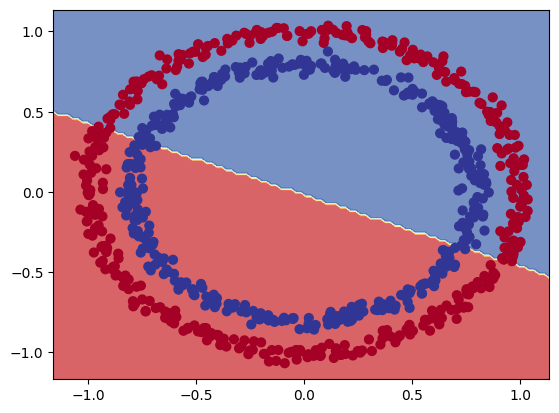

In [100]:
plot_decision_boundary(model_1, X_train, y_train)

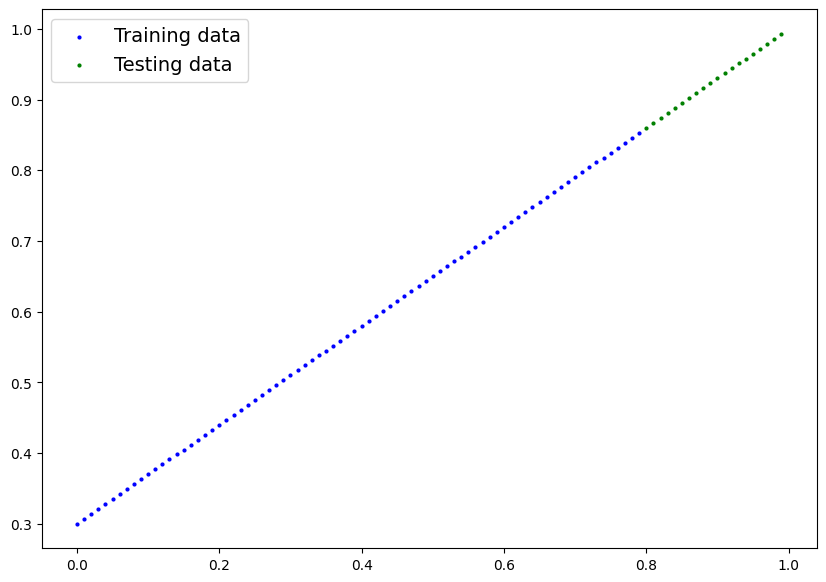

In [101]:
#lets check for str8 line
w=0.7
b= 0.3
start= 0
end= 1
step= 0.01
x= torch.arange(start, end, step).unsqueeze(dim= 1)
y= w*x+b
tr_split= int(len(x)*0.8)
x_train, y_train= x[:tr_split], y[:tr_split]
x_test, y_test= x[tr_split:], y[tr_split:]

plot_predictions(train_data= x_train,
                 train_labels= y_train,
                 test_data= x_test,
                 test_labels= y_test,
                 predictions= None)

In [102]:
model_2= nn.Sequential(
    nn.Linear(in_features= 1, out_features= 10),
    nn.Linear(in_features= 10, out_features= 10),
    nn.Linear(in_features= 10, out_features= 1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [103]:
loss_fn= nn.L1Loss()
optimizer= torch.optim.SGD(params= model_2.parameters(),
                           lr=0.1)

x_train =x_train.to(device)
x_test  =x_test.to(device)
y_train= y_train.to(device)
y_test= y_test.to(device)


torch.manual_seed(42)
epochs= 100
for epoch in range(epochs):
  #training
  model_2.train()
  y_pred= model_2(x_train)

  train_loss= loss_fn(y_pred, y_train )
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred= model_2(x_test)
    test_loss= loss_fn(test_pred, y_test )


  if epoch%10==0:
     print(f"Epoch: {epoch} | Loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")



Epoch: 0 | Loss: 0.75986 | Test loss: 0.54143
Epoch: 10 | Loss: 0.14550 | Test loss: 0.02363
Epoch: 20 | Loss: 0.14420 | Test loss: 0.05597
Epoch: 30 | Loss: 0.10136 | Test loss: 0.03785
Epoch: 40 | Loss: 0.07525 | Test loss: 0.00984
Epoch: 50 | Loss: 0.07625 | Test loss: 0.02102
Epoch: 60 | Loss: 0.10320 | Test loss: 0.02754
Epoch: 70 | Loss: 0.08643 | Test loss: 0.01007
Epoch: 80 | Loss: 0.06937 | Test loss: 0.01326
Epoch: 90 | Loss: 0.08678 | Test loss: 0.03027


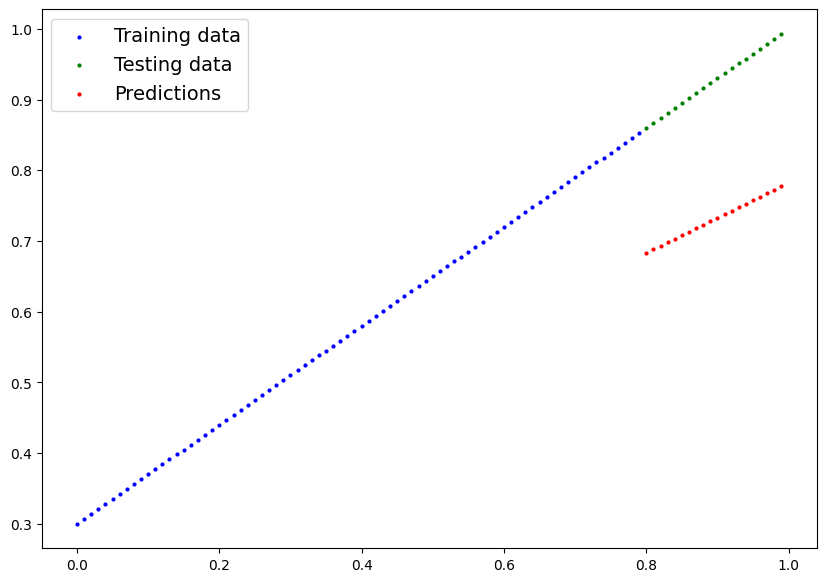

In [104]:
with torch.inference_mode():
  y_preds= model_2(x_test)

plot_predictions(train_data= x_train.cpu(),
                 train_labels= y_train.cpu(),
                 test_data= x_test.cpu(),
                 test_labels= y_test.cpu(), predictions=y_preds)

It's working better on small datasets and overfitting ,
 so solution is non linearity capture.

In [105]:
#data
from sklearn.datasets import make_circles
X,y= make_circles(n_samples= 1000,
                  noise= 0.02,
                  random_state= 42)


In [106]:
X

array([[ 0.76026594,  0.22387823],
       [-0.76722217,  0.1455425 ],
       [-0.80815854,  0.14894355],
       ...,
       [-0.14123526, -0.80195115],
       [ 0.67509008, -0.75465723],
       [ 0.28237752,  0.96205688]])

In [107]:
import pandas as pd
df_1= pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label" :y}) #dataframe of dictionary

df_1.head()

,X1,X2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0


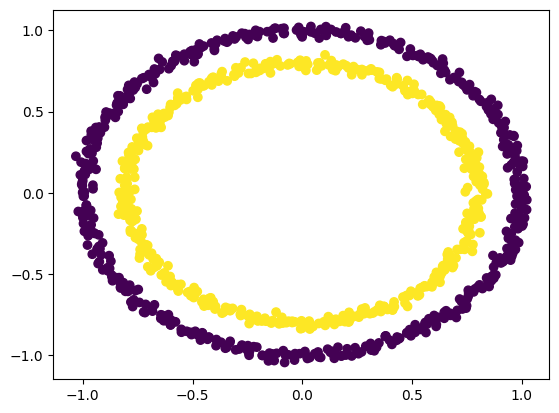

In [108]:
plt.scatter(x=df_1["X1"], y=df_1["X2"], c=df_1["label"], cmap="viridis")

In [109]:
import torch
from sklearn.model_selection import train_test_split

#numpy to tensor
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X_train,X_test, y_train,y_test =train_test_split(X, y, test_size=0.2,
                                                 random_state=42)

In [111]:
#model
from torch import nn
class NN_3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2,  out_features= 10)
    self.layer_2= nn.Linear(in_features=10, out_features= 10)
    self.layer_3= nn.Linear(in_features=10, out_features= 1 )
    self.relu   = nn.ReLU()

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) #multi layer relu

model_relu= NN_3().to(device)
model_relu

NN_3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [114]:
optimizer= torch.optim.Adam(params= model_relu.parameters(),
                            lr=0.1)
loss_fn= nn.BCEWithLogitsLoss()

In [115]:
X_train =X_train.to(device)
X_test =X_test.to(device)
y_train= y_train.to(device)
y_test= y_test.to(device)

In [116]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [124]:
torch.manual_seed(42)
epochs= 100
for epoch in range(epochs):
  model_relu.train()
  y_logits= model_relu(X_train)
  y_pred= torch.round(torch.sigmoid(y_logits))

  acc= accuracy(y_true= y_train, y_pred= y_pred)
  train_loss= loss_fn(y_logits, y_train.unsqueeze(dim=1))

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_relu.eval()
  with torch.inference_mode():
    test_logits= model_relu(X_test)
    test_pred= torch.round(torch.sigmoid(test_logits))

    test_acc= accuracy(y_true= y_test ,y_pred= test_pred)
    test_loss= loss_fn(test_logits, y_test.unsqueeze(dim=1))

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69517, Accuracy: 400.00% | Test Loss: 0.68701, Test Accuracy: 100.00%
Epoch: 10 | Loss: 0.55911, Accuracy: 400.00% | Test Loss: 0.53360, Test Accuracy: 100.00%
Epoch: 20 | Loss: 0.16332, Accuracy: 400.00% | Test Loss: 0.14810, Test Accuracy: 100.00%
Epoch: 30 | Loss: 0.01649, Accuracy: 400.00% | Test Loss: 0.01970, Test Accuracy: 100.00%
Epoch: 40 | Loss: 0.00512, Accuracy: 400.00% | Test Loss: 0.00786, Test Accuracy: 100.00%
Epoch: 50 | Loss: 0.00176, Accuracy: 400.00% | Test Loss: 0.00265, Test Accuracy: 100.00%
Epoch: 60 | Loss: 0.00093, Accuracy: 400.00% | Test Loss: 0.00216, Test Accuracy: 100.00%
Epoch: 70 | Loss: 0.00071, Accuracy: 400.00% | Test Loss: 0.00154, Test Accuracy: 100.00%
Epoch: 80 | Loss: 0.00061, Accuracy: 400.00% | Test Loss: 0.00116, Test Accuracy: 100.00%
Epoch: 90 | Loss: 0.00055, Accuracy: 400.00% | Test Loss: 0.00115, Test Accuracy: 100.00%


In [128]:
model_relu.eval()
with torch.inference_mode():
  y_preds= torch.round(torch.sigmoid(model_relu(X_test))).squeeze()


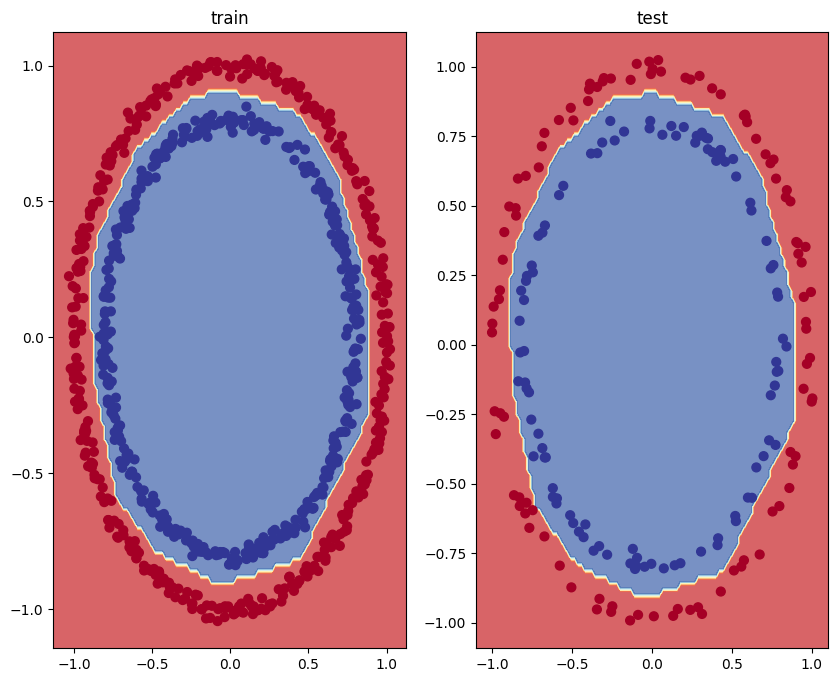

In [130]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_relu, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_relu, X_test, y_test)

#non linear activation functions

In [131]:
A= torch.arange(-10,10,1 ,dtype= torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [133]:
#create relu
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

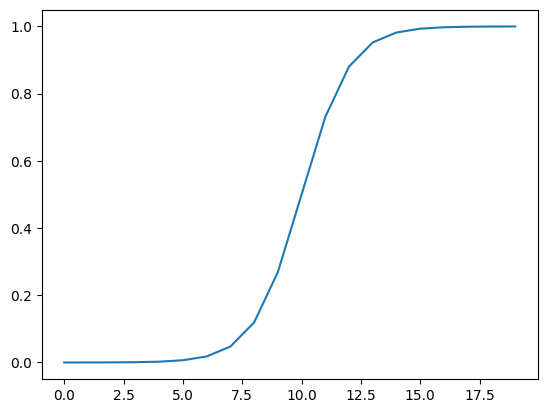

In [136]:
def sigmoid(x):
  return 1/ (1+ torch.exp(-x))

sigmoid(A)
plt.plot(sigmoid(A))

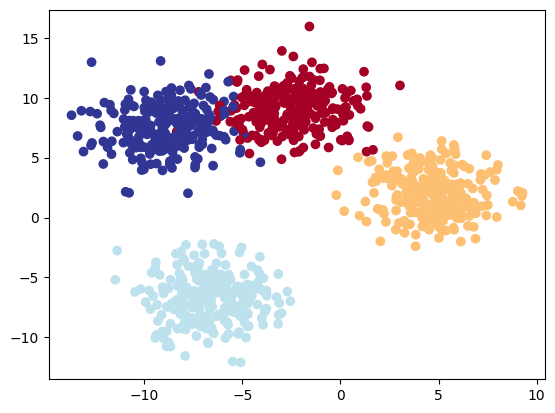

In [147]:
#MULTI CLASS DATA
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x_blob, y_blob= make_blobs(n_samples= 1000, n_features=2, centers=4, cluster_std=1.8,
                           random_state= 42)
#numpy to tensor
x_blob= torch.from_numpy(x_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.LongTensor)

#split
X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(x_blob, y_blob, test_size= 0.2 ,random_state= 42)

#plot
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob,  cmap=plt.cm.RdYlBu)


In [148]:
#device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [155]:
from torch import nn
#model
class Blobmodel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units= 8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= 2, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units ,out_features= hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units ,out_features= output_features)
    )
  def forward(self, x: torch.Tensor):
    return self.linear_layer_stack(x)

#INSTANCE
model_blob= Blobmodel(input_features= 2, output_features=4, hidden_units=8).to(device)
model_blob

Blobmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [156]:
#o and l
optimizer= torch.optim.Adam(params= model_blob.parameters(), lr= 0.1)
loss_fn= nn.CrossEntropyLoss()

LOGITS(raw outputs) --> PRED PROBA --> PRED LABELS(softmax multiclass)

In [160]:
X_train.shape

torch.Size([800, 2])

In [168]:
model_blob(X_blob_train. to(device)).shape
torch.softmax(model_blob(X_blob_train. to(device)), dim=1)[:5]
#Perform softmax calculation on logits across dimension 1 to get prediction probabilities

tensor([[0.1324, 0.2660, 0.4394, 0.1622],
        [0.1382, 0.7590, 0.0731, 0.0298],
        [0.4781, 0.1461, 0.1096, 0.2662],
        [0.3875, 0.2700, 0.1467, 0.1958],
        [0.1876, 0.6772, 0.0886, 0.0466]], grad_fn=<SliceBackward0>)

In [169]:
torch.sum(torch.softmax(model_blob(X_blob_train. to(device)), dim=1)[0])

tensor(1., grad_fn=<SumBackward0>)

In [170]:
#which index it belongs
torch.argmax(torch.softmax(model_blob(X_blob_train. to(device)), dim=1)[0])

tensor(2)

Note: To summarize the above, a model's raw output is referred to as logits.

For a multi-class classification problem, to turn the logits into prediction probabilities, you use the softmax activation function (torch.softmax).

The index of the value with the highest prediction probability is the class number the model thinks is most likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

In [174]:
#training
epochs= 100

for epoch in range(epochs):
  model_blob.train()
  y_logits= model_blob(X_blob_train)
  y_pred  = torch.softmax(y_logits ,dim=1).argmax(dim= 1)

  train_acc= accuracy(y_true =y_blob_train, y_pred= y_pred)
  train_loss= loss_fn(y_logits, y_blob_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_blob.eval()
  with torch.inference_mode():
    test_logits= model_blob(X_blob_test)
    test_pred =torch.softmax(test_logits, dim= 1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy(y_true=y_blob_test,
                             y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.32275, Acc: 0.03% | Test Loss: 0.90574, Test Acc: 0.69%
Epoch: 10 | Loss: 0.09258, Acc: 0.97% | Test Loss: 0.13368, Test Acc: 0.95%
Epoch: 20 | Loss: 0.08499, Acc: 0.97% | Test Loss: 0.05850, Test Acc: 0.97%
Epoch: 30 | Loss: 0.05717, Acc: 0.98% | Test Loss: 0.02767, Test Acc: 0.99%
Epoch: 40 | Loss: 0.04906, Acc: 0.98% | Test Loss: 0.02855, Test Acc: 0.99%
Epoch: 50 | Loss: 0.04710, Acc: 0.98% | Test Loss: 0.03415, Test Acc: 0.98%
Epoch: 60 | Loss: 0.04473, Acc: 0.98% | Test Loss: 0.02920, Test Acc: 0.98%
Epoch: 70 | Loss: 0.04439, Acc: 0.98% | Test Loss: 0.02563, Test Acc: 0.98%
Epoch: 80 | Loss: 0.04403, Acc: 0.98% | Test Loss: 0.02489, Test Acc: 0.99%
Epoch: 90 | Loss: 0.04397, Acc: 0.98% | Test Loss: 0.02471, Test Acc: 0.99%


In [176]:
model_blob.eval()
with torch.inference_mode():
  y_logits= model_blob(X_blob_test)

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 0.99%


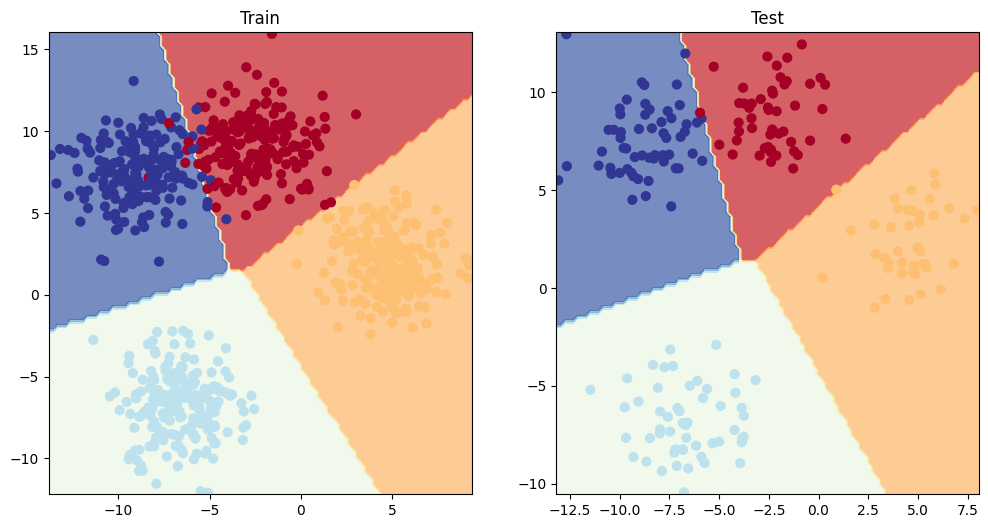

In [178]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob, X_blob_test, y_blob_test)

In [187]:
#pip install torchmetrics


In [189]:
y_blob_test.shape, y_preds.shape

(torch.Size([200]), torch.Size([200]))

In [191]:
import torch
import torchmetrics
from torchmetrics.classification import MulticlassAccuracy

# Initialize the metric for 4 classes
metric = MulticlassAccuracy(num_classes=4)

# Get the accuracy
accuracy = metric(y_blob_test, y_preds)

print(f"Multiclass Accuracy: {accuracy}")


Multiclass Accuracy: 0.990587592124939
